# Forecast Exchange Rates

## Importing Library

In [1]:
#VIZ AND DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plotly
from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#datetime
import datetime as dt

#warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
inrusd = pd.read_csv('Dataset.csv',parse_dates=["observation_date"])
inrusd.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


### Copy Data

In [3]:
#Copy Data
df = inrusd.copy()
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### Shape

In [4]:
df.shape

(12649, 2)

#### Renaming 

In [5]:
#renaming the date and rate
data = df[['observation_date', 'DEXINUS']]
data.columns = ['date', 'rate']

In [6]:
data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


Converting rates to numeric

In [8]:
data['rate'] = pd.to_numeric(data.rate)

Sorting Date in Ascending order

In [9]:
data = data.sort_values('date', ascending=True)

#### Descriptive Stats

In [10]:
data.rate.describe()

count    12155.000000
mean        34.206133
std         21.089190
min          7.190000
25%         12.075000
50%         35.890000
75%         47.650000
max         76.950000
Name: rate, dtype: float64

#### Checking Null Values

In [11]:
data.isnull().sum()

date      0
rate    494
dtype: int64

Forward Filling Null Values

In [12]:
#Forward Filling
data.fillna(method='ffill', inplace=True)

In [13]:
data.isnull().sum()

date    0
rate    0
dtype: int64

Convert datatype int to float

In [14]:
#transformation of values to float
data['rate'] = pd.to_numeric(data['rate'], downcast="float")

#### info

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 247.1 KB


#### Checking Duplicates

In [16]:
data.duplicated().sum()

0

No Duplicates found

### Final Data

In [17]:
final_data = data.copy()

In [18]:
final_data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [19]:
data1 = data.copy()

In [20]:
#data1 = data.set_index('date')

In [21]:
data1.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [22]:
final_data1 = data1.copy()

### Segregating Years, Months, Day

In [23]:
#copy data 
df1 = final_data.copy()

In [24]:
#if date is not set to index then use 
#Years
df1['Year']= [i.year for i in df1['date']]
#Months
df1['Month']= [i.month for i in df1['date']]
#Days
df1['Day']= [i.day for i in df1['date']]

In [25]:
#Date is set to index
#Years
#df1['Year']= df1.index.year
#Months
#df1['Month']= df1.index.month
#Days
#df1['Day']= df1.index.day

In [26]:
df1.head()

,date,rate,Year,Month,Day
0,1973-01-02,8.02,1973,1,2
1,1973-01-03,8.02,1973,1,3
2,1973-01-04,8.00,1973,1,4
3,1973-01-05,8.01,1973,1,5
4,1973-01-08,8.00,1973,1,8


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
 2   Year    12649 non-null  int64         
 3   Month   12649 non-null  int64         
 4   Day     12649 non-null  int64         
dtypes: datetime64[ns](1), float32(1), int64(3)
memory usage: 543.5 KB


## Visialization

### Line Plot

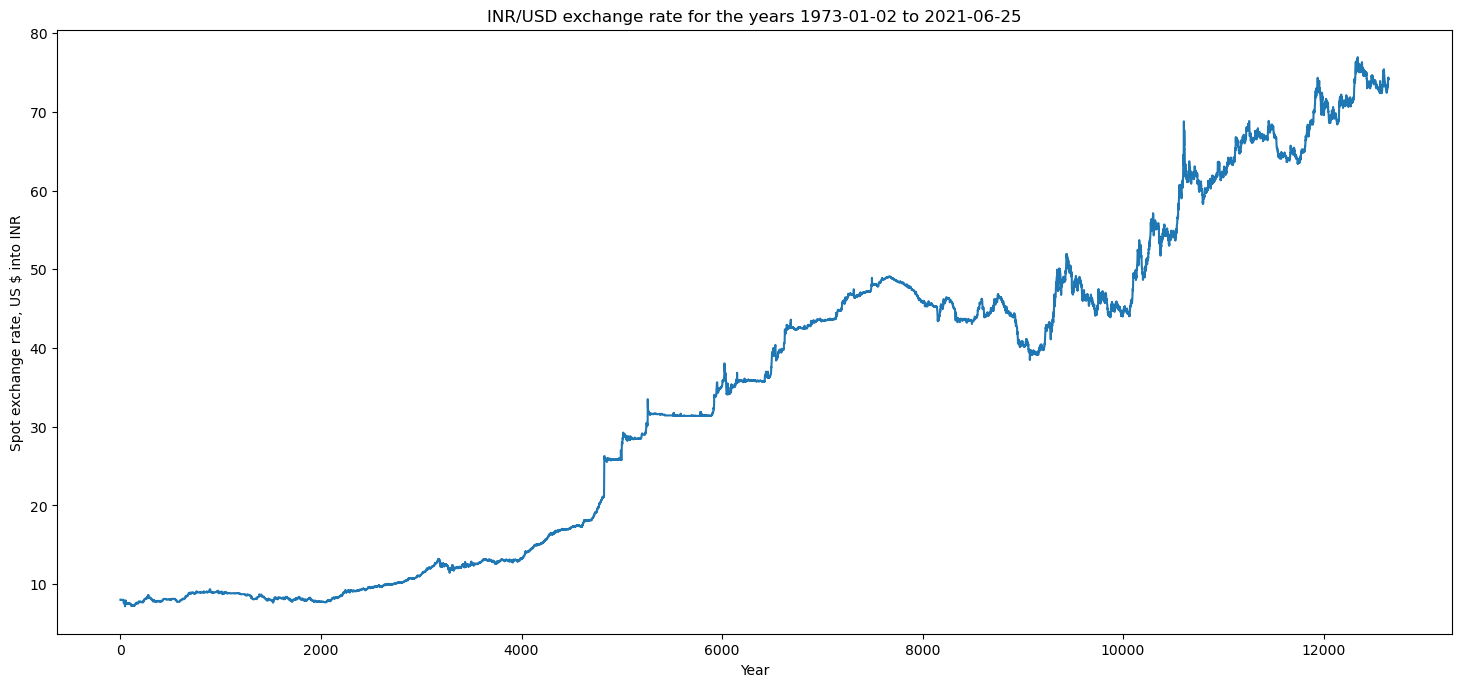

In [28]:
#Line Plot
plt.figure(figsize =(18,8),dpi=100)
df1.rate.plot()
plt.ylabel('Spot exchange rate, US \$ into INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

### Line Plot on 10 years interval

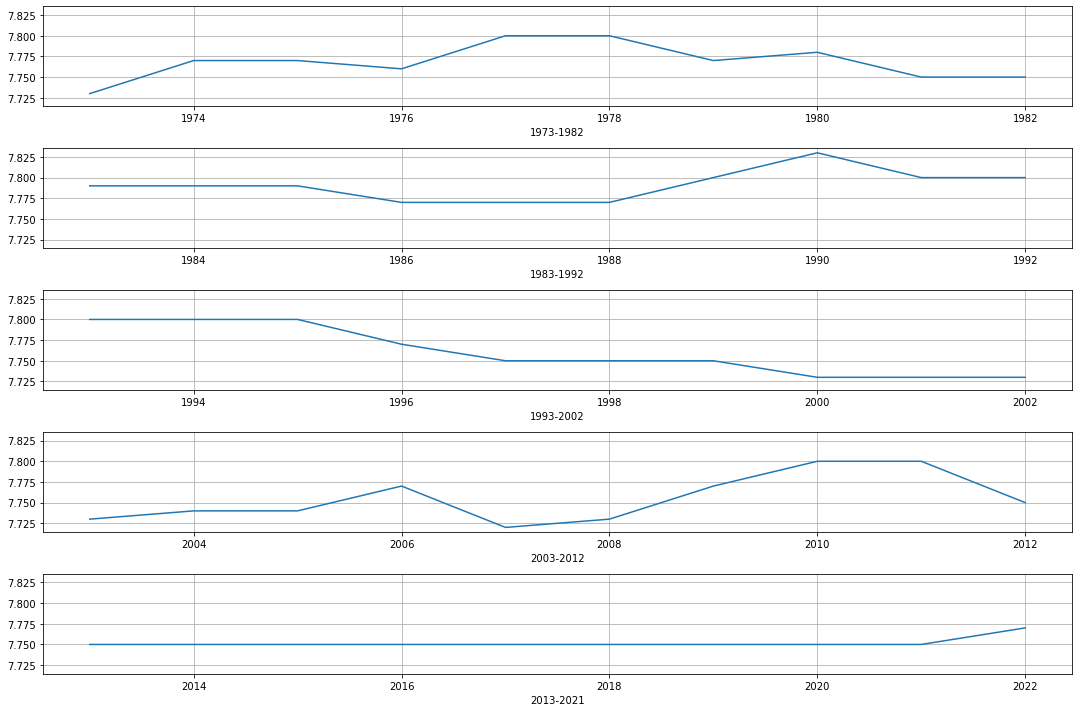

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10), sharey=True)
df1.loc['1973':'1982']['rate'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1983':'1992']['rate'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1993':'2002']['rate'].plot(xlabel="1993-2002",
                                                ax=ax[2],
                                                grid=True)
df1.loc['2003':'2012']['rate'].plot(xlabel="2003-2012",
                                                ax=ax[3],
                                                grid=True)
df1.loc['2013':'2022']['rate'].plot(xlabel="2013-2021",
                                                ax=ax[4],
                                                grid=True)
plt.tight_layout()
plt.show()

### Box Plot

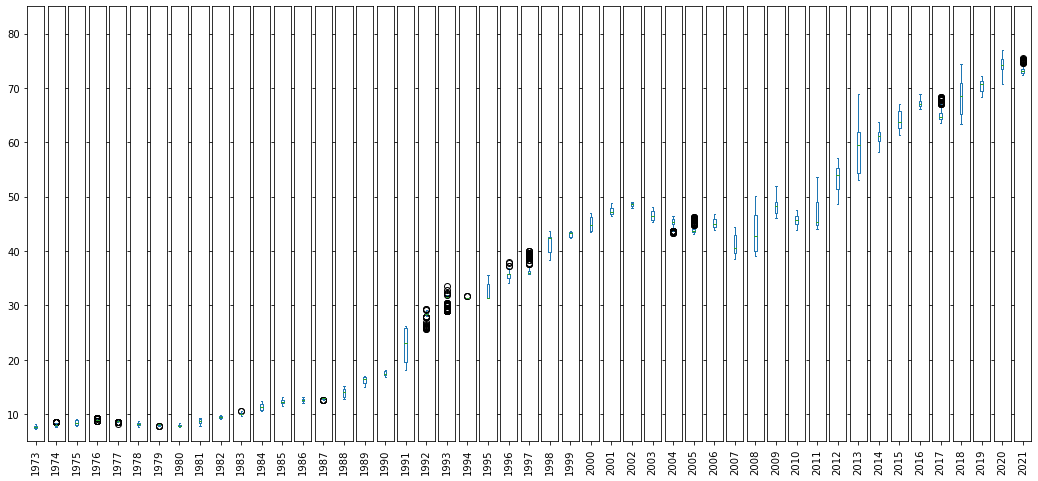

In [30]:
box1 = df1.groupby('Year')

years = list(np.unique(df1.Year))

fig, ax = plt.subplots(1, len(years), figsize=(18, 8), sharey=True)
for i, year in enumerate(years):
    X = box1.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='rate',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           ylim=(5, 85),
           sharey=True)
    plt.tight_layout
#plt.title('box plot');
plt.show()

### Box Plot with 5 years interval

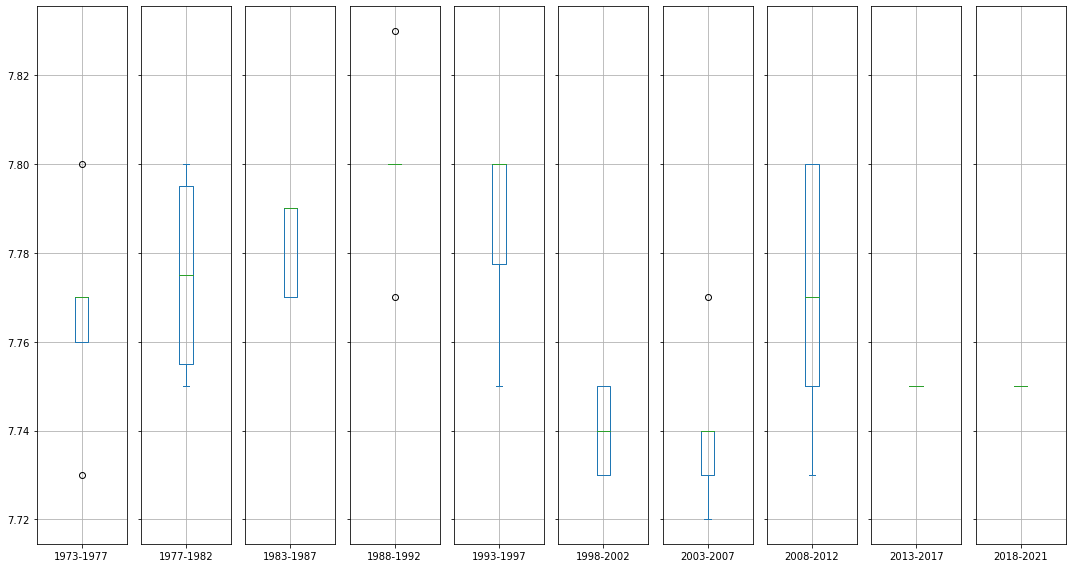

In [31]:
fig, ax = plt.subplots(1, 10, figsize=(15, 8), sharey=True)
df1.loc['1973':'1977']['rate'].plot(kind='box',
                                                label="1973-1977",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1977':'1982']['rate'].plot(kind='box',
                                                label="1977-1982",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1983':'1987']['rate'].plot(kind='box',
                                                label="1983-1987",
                                                stacked=True,
                                                ax=ax[2],
                                                grid=True)
df1.loc['1988':'1992']['rate'].plot(kind='box',
                                                label="1988-1992",
                                                stacked=True,
                                                ax=ax[3],
                                                grid=True)
df1.loc['1992':'1997']['rate'].plot(kind='box',
                                                label="1993-1997",
                                                ax=ax[4],
                                                grid=True)
df1.loc['1997':'2002']['rate'].plot(kind='box',
                                                label="1998-2002",
                                                ax=ax[5],
                                                grid=True)
df1.loc['2003':'2007']['rate'].plot(kind='box',
                                                label="2003-2007",
                                                ax=ax[6],
                                                grid=True)
df1.loc['2008':'2012']['rate'].plot(kind='box',
                                                label="2008-2012",
                                                ax=ax[7],
                                                grid=True)
df1.loc['2013':'2017']['rate'].plot(kind='box',
                                                label="2013-2017",
                                                ax=ax[8],
                                                grid=True)
df1.loc['2018':'2021']['rate'].plot(kind='box',
                                                label="2018-2021",
                                                ax=ax[9],
                                                grid=True)
plt.tight_layout()
plt.show()

## LSTM

In [32]:
df2 = final_data.copy()
df2 = df2.set_index('date')

In [33]:
df2.head()

,rate
date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00


### MinMax Scaler

In [34]:
#Library
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
df3 = scaler.fit_transform(df2)

### Splitting Data

In [37]:
#Training and test sets
split_point_lstm = round(len(df3)*(3/4))
df3_train = df3[:split_point_lstm]
lstm_len_train = len(df3_train)
df3_test = df3[split_point_lstm:]
lstm_len_test = len(df3_test)

In [38]:
print(df3_train.shape)
print(df3_test.shape)

(9487, 1)
(3162, 1)


### Transformation

In [39]:
def get_data(data3_lstm, look_back):
  datax, datay = [],[]
  for i in range(len(data3_lstm)-look_back-1):
    datax.append(data3_lstm[i:(i+look_back),0])
    datay.append(data3_lstm[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [40]:
look_back = 1

x_train_lstm , y_train_lstm = get_data(df3_train, look_back)
print(x_train_lstm.shape)
print(y_train_lstm.shape)

(9485, 1)
(9485,)


In [41]:
x_test_lstm , y_test_lstm = get_data(df3_test,look_back)
print(x_test_lstm.shape)
print(y_test_lstm.shape)

(3160, 1)
(3160,)


In [42]:
#Processing train and test sets for LSTM model
x_train_lstm = x_train_lstm.reshape(x_train_lstm.shape[0],x_train_lstm.shape[1], 1)
x_test_lstm = x_test_lstm.reshape(x_test_lstm.shape[0],x_test_lstm.shape[1], 1)

In [43]:
print(x_train_lstm.shape)
print(x_test_lstm.shape)

(9485, 1, 1)
(3160, 1, 1)


### Model

In [44]:
#Defining the LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM
#METRICS
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

In [45]:
n_features_lstm=x_train_lstm.shape[1]
model_lstm=Sequential()
model_lstm.add(LSTM(100,activation='relu',input_shape=(1,1)))
model_lstm.add(Dense(n_features_lstm))

In [46]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


#### Compilation

In [47]:
model_lstm.compile(optimizer='adam', loss = 'mse')

In [48]:
#Training
model_lstm.fit(x_train_lstm,y_train_lstm, epochs = 5, batch_size=1)

Epoch 1/5
9485/9485 [==============================] - 24s 748us/step - loss: 0.0064
Epoch 2/5
9485/9485 [==============================] - 8s 868us/step - loss: 8.9194e-06
Epoch 3/5
9485/9485 [==============================] - 9s 980us/step - loss: 1.0680e-05
Epoch 4/5
9485/9485 [==============================] - 9s 943us/step - loss: 9.3822e-06
Epoch 5/5
9485/9485 [==============================] - 8s 838us/step - loss: 7.6351e-06


In [49]:
#Prediction using the trained model
scaler.scale_

array([0.01433486], dtype=float32)

In [50]:
y_pred_lstm = model_lstm.predict(x_test_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
print(y_pred_lstm[:10])

[[49.800453]
 [49.530796]
 [47.732788]
 [47.802723]
 [47.453053]
 [47.453053]
 [47.10337 ]
 [47.10337 ]
 [47.852673]
 [47.762756]]


In [51]:
#Processing test shape
y_test_lstm = np.array(y_test_lstm).reshape(-1,1)
y_test_lstm = scaler.inverse_transform(y_test_lstm)
print(y_test_lstm[:10])

[[49.380005]
 [47.579998]
 [47.65    ]
 [47.299995]
 [47.299995]
 [46.949997]
 [46.949997]
 [47.699997]
 [47.61    ]
 [47.499996]]


#### Visualization

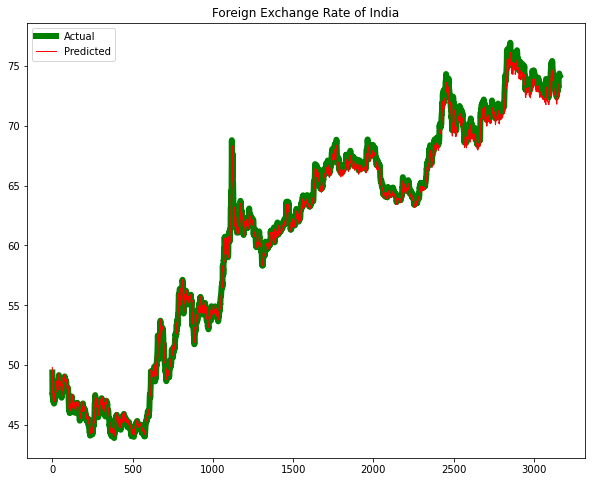

In [52]:
#Visualizing the results
plt.figure(figsize=(10,8))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test_lstm , label = 'Actual', color = 'g', linewidth=6)
plt.plot(y_pred_lstm , label = 'Predicted', color = 'r', linewidth=1)
plt.legend()

#### Mean Squared Error

In [53]:
mean_squared_error(y_test_lstm, y_pred_lstm)

0.20672634

## LSTM on 1 year Data

In [54]:
scaler_one_year = MinMaxScaler()

### Data

In [55]:
df_oneyear = final_data.copy()

In [56]:
df_oneyear = df_oneyear.set_index('date')

In [57]:
one_year = df_oneyear.loc[df_oneyear.index >= '2020-06-25']

In [58]:
lstm_one_year = one_year.copy()

In [59]:
lstm_one_year.head()

,rate
date,
2020-06-25,75.580002
2020-06-26,75.629997
2020-06-29,75.519997
2020-06-30,75.529999
2020-07-01,75.500000


In [60]:
one_year_lstm = scaler.fit_transform(lstm_one_year)

In [61]:
one_year_lstm

array([[0.9846649 ],
       [1.        ],
       [0.9662571 ],
       [0.969326  ],
       [0.96012306],
       [0.73926353],
       [0.73926353],
       [0.69018555],
       [0.7484665 ],
       [0.78834534],
       [0.84355927],
       [0.8496933 ],
       [0.85582924],
       [0.92331314],
       [0.84049225],
       [0.84049225],
       [0.7852764 ],
       [0.7361965 ],
       [0.6656456 ],
       [0.67177963],
       [0.7484665 ],
       [0.7361965 ],
       [0.7361965 ],
       [0.7791424 ],
       [0.7822094 ],
       [0.7699394 ],
       [0.77607536],
       [0.8680973 ],
       [0.82515335],
       [0.7453995 ],
       [0.7668724 ],
       [0.8190193 ],
       [0.7791424 ],
       [0.6871166 ],
       [0.72392845],
       [0.7484665 ],
       [0.7668724 ],
       [0.72699356],
       [0.69018555],
       [0.76073647],
       [0.80981827],
       [0.7822094 ],
       [0.5521469 ],
       [0.56134987],
       [0.5674858 ],
       [0.4662571 ],
       [0.22699356],
       [0.269

### Splitting

In [62]:
#Training and test sets
one_year_split_point = round(len(one_year_lstm)*(3/4))
one_year_lstm_train = one_year_lstm[:one_year_split_point]
one_year_lstm_len_train = len(one_year_lstm_train)
one_year_lstm_test = one_year_lstm[one_year_split_point:]
one_year_lstm_len_test = len(one_year_lstm_test)

In [63]:
print(one_year_lstm_train.shape)
print(one_year_lstm_test.shape)

(196, 1)
(66, 1)


### Transformation

In [64]:
def get_data_one_year(data_one_year_lstm, look_back_one_year):
  datax, datay = [],[]
  for i in range(len(data_one_year_lstm)-look_back_one_year-1):
    datax.append(data_one_year_lstm[i:(i+look_back_one_year),0])
    datay.append(data_one_year_lstm[i+look_back_one_year,0])
  return np.array(datax) , np.array(datay)

In [65]:
look_back_one_year = 1

x_train_one_year , y_train_one_year = get_data_one_year(one_year_lstm_train, look_back_one_year)
print(x_train_one_year.shape)
print(y_train_one_year.shape)

(194, 1)
(194,)


In [66]:
x_test_one_year , y_test_one_year = get_data_one_year(one_year_lstm_test, look_back_one_year)
print(x_test_one_year.shape)
print(y_test_one_year.shape)

(64, 1)
(64,)


In [67]:
#Processing train and test sets for LSTM model
x_train_one_year = x_train_one_year.reshape(x_train_one_year.shape[0],x_train_one_year.shape[1], 1)
x_test_one_year = x_test_one_year.reshape(x_test_one_year.shape[0],x_test_one_year.shape[1], 1)

In [68]:
print(x_train_one_year.shape)
print(x_test_one_year.shape)

(194, 1, 1)
(64, 1, 1)


### Model

In [69]:
n_features_one_year=x_train_one_year.shape[1]
model_one_year=Sequential()
model_one_year.add(LSTM(100,activation='relu',input_shape=(1,1)))
model_one_year.add(Dense(n_features_one_year))

In [70]:
model_one_year.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### Compilation

In [71]:
model_one_year.compile(optimizer='adam', loss = 'mse')

In [72]:
#Training
model_one_year.fit(x_train_one_year,y_train_one_year, epochs = 5, batch_size=1)

Epoch 1/5
194/194 [==============================] - 2s 775us/step - loss: 0.1545
Epoch 2/5
194/194 [==============================] - 0s 843us/step - loss: 0.0255
Epoch 3/5
194/194 [==============================] - 0s 819us/step - loss: 0.0161
Epoch 4/5
194/194 [==============================] - 0s 854us/step - loss: 0.0110
Epoch 5/5
194/194 [==============================] - 0s 762us/step - loss: 0.0067


In [73]:
#Prediction using the trained model
scaler.scale_

array([0.306749], dtype=float32)

In [74]:
y_pred_one_year = model_one_year.predict(x_test_one_year)
y_pred_one_year = scaler.inverse_transform(y_pred_one_year)
print(y_pred_one_year[:10])

[[72.87759 ]
 [72.94737 ]
 [73.474884]
 [73.23372 ]
 [73.37231 ]
 [73.41152 ]
 [73.34894 ]
 [73.506874]
 [74.24301 ]
 [74.446335]]


In [75]:
#Processing test shape
y_test_one_year = np.array(y_test_one_year).reshape(-1,1)
y_test_one_year = scaler.inverse_transform(y_test_one_year)
print(y_test_one_year[:10])

[[72.75]
 [73.45]
 [73.14]
 [73.32]
 [73.37]
 [73.29]
 [73.49]
 [74.35]
 [74.57]
 [74.72]]


#### Visualization

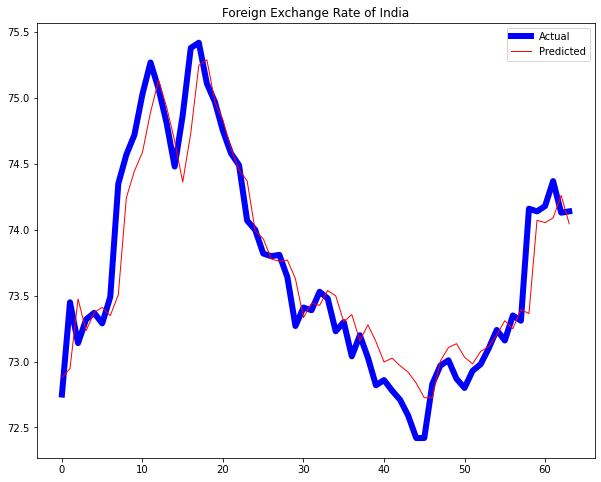

In [76]:
#Visualizing the results
plt.figure(figsize=(10,8))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test_one_year , label = 'Actual', color = 'b', linewidth=6)
plt.plot(y_pred_one_year , label = 'Predicted', color = 'r', linewidth=1)
plt.legend()

#### Mean Square Error

In [77]:
mean_squared_error(y_test_one_year, y_pred_one_year)

0.07121718

In [78]:
close_data = df2['rate'].values

### Prediction

In [79]:
lose_data = close_data.reshape((-1))

def predict(num_prediction, model_one_year):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model_one_year.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df1['date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model_one_year)
forecast_dates = predict_dates(num_prediction)

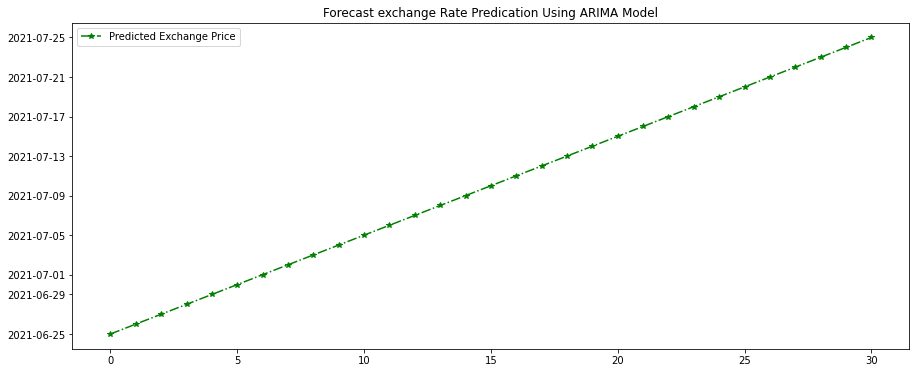

In [80]:
#plot
plt.figure(figsize=(15,6))
plt.plot(forecast_dates, color='green', linestyle="dashdot", marker='*', label = "Predicted Exchange Price")
plt.title('Forecast exchange Rate Predication Using ARIMA Model')
plt.legend()
plt.show()

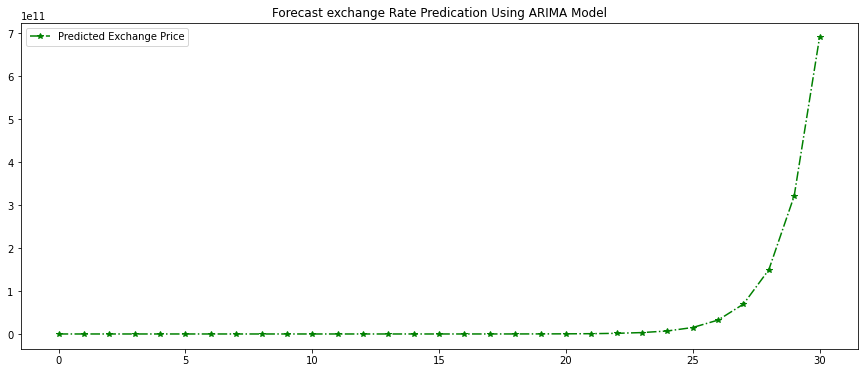

In [81]:
#plot
plt.figure(figsize=(15,6))
plt.plot(forecast, color='green', linestyle="dashdot", marker='*', label = "Predicted Exchange Price")
plt.title('Forecast exchange Rate Predication Using ARIMA Model')
plt.legend()
plt.show()

In [82]:
forecast

array([7.4139999e+01, 1.5909122e+02, 3.4159192e+02, 7.3399658e+02,
       1.5778132e+03, 3.3916936e+03, 7.2905449e+03, 1.5670935e+04,
       3.3684172e+04, 7.2402750e+04, 1.5562644e+05, 3.3451175e+05,
       7.1901688e+05, 1.5454920e+06, 3.3219602e+06, 7.1403920e+06,
       1.5347925e+07, 3.2989614e+07, 7.0909560e+07, 1.5241662e+08,
       3.2761210e+08, 7.0418624e+08, 1.5136140e+09, 3.2534395e+09,
       6.9931100e+09, 1.5031348e+10, 3.2309152e+10, 6.9446951e+10,
       1.4927282e+11, 3.2085465e+11, 6.8966135e+11], dtype=float32)